In [1]:
#imports
#numpy, pandas, scipy, math, mathpolotilib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

# para normalizar
from sklearn import preprocessing

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.cross_validation import train_test_split

import os
os.chdir("C:/Users/Katya/Dropbox/Curso DAyBD/Curso 5/C5 Task 2")


C:\Users\Katya\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
#data
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
rawData = rawData.drop(["ID"], axis=1)

In [4]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

## Modelos de Regresion  -  Según el plan de ataque

In [20]:
#features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [21]:
#dependent variable
depVar = rawData['PAY_AMT6']

In [7]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
BILL_AMT2    1000 non-null int64
BILL_AMT3    1000 non-null int64
BILL_AMT4    1000 non-null int64
BILL_AMT5    1000 non-null int64
BILL_AMT6    1000 non-null int64
PAY_AMT1     1000 non-null int64
PAY_AMT2     1000 non-null int64
PAY_AMT3     1000 non-null int64
PAY_AMT4     1000 non-null int64
PAY_AMT5     1000 non-null int64
PAY_AMT6     1000 non-null int64
dtypes: int64(11)
memory usage: 86.0 KB


In [8]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0       0
1    2000
2    5000
3    1000
4     679
Name: PAY_AMT6, dtype: int64

In [9]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
29900          0          0          0          0          0         0   
29901      48750     103486      50590      50248      49387         0   
29902     168088     168955     161351     126198     124746    168096   
29903      17082      13333         99         99     172104     10018   
29904      56021      54126      58732      59306      59728      2600   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
29900         0         0         0         0         0  
29901      6556      3250      1563      1208       781  
29902      6409      7335      4448      4519      5003  
29903     13333        99        99    172104     30013  
29904      4553      5800      2000      1000      1462  


In [10]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900        0
29901      781
29902     5003
29903    30013
29904     1462
Name: PAY_AMT6, dtype: int64

In [11]:
from sklearn.cross_validation import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [13]:
X_train.shape, X_test.shape

((750, 11), (250, 11))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((562, 11), (188, 11))

In [43]:
model = LinearRegression(n_jobs=10)

In [44]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [45]:
#dependent variable
print(depVar)

0            0
1         2000
2         5000
3         1000
4          679
5          800
6        13770
7         1542
8         1000
9            0
10          66
11        3640
12           0
13           0
14        3000
15        1100
16           0
17       50000
18           0
19           0
20       33764
21           0
22        1820
23        1128
24        2000
25         997
26        1000
27        1012
28           0
29           0
         ...  
29970    16080
29971     3000
29972     4800
29973        0
29974     1000
29975     7022
29976        0
29977     5000
29978    10059
29979        0
29980     2000
29981      585
29982        0
29983     1701
29984     1000
29985        0
29986        0
29987     4005
29988     6009
29989        0
29990     2000
29991        0
29992        0
29993     2000
29994     4000
29995     1000
29996        0
29997     3100
29998     1804
29999     1000
Name: PAY_AMT6, Length: 30000, dtype: int64


In [46]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

In [47]:
# Modelo Random Forest
modelRF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [48]:
#  Support Vector Regression
modelSVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [49]:
# Linear Regression
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

print(cross_val_score(modelRF, X_train, y_train)) 

In [50]:
print(cross_val_score(modelSVR, X_train, y_train)) 

[-0.05824247 -0.03430274 -0.0856286 ]


In [51]:
print(cross_val_score(modelLR, X_train, y_train)) 

[1. 1. 1.]


In [52]:
modelRF.score(X_train, y_train)

0.9898543823833528

In [53]:
modelSVR.score(X_train, y_train)

-0.035074260808923174

In [54]:
modelLR.score(X_train, y_train)

1.0

In [55]:
predictions = modelRF.predict(X_test)

In [56]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [57]:
predRsquared = r2_score(y_test,predictions)

In [58]:
#Make Predictions
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.713
RMSE: 21835.124


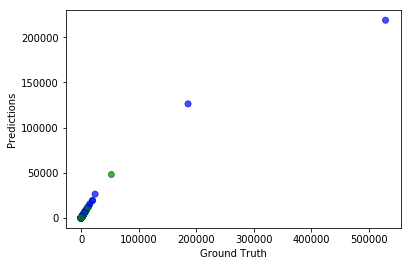

In [42]:
plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [59]:
predictions

array([4.661000e+02, 0.000000e+00, 1.000000e+03, 5.000000e+03,
       4.001800e+03, 1.007940e+04, 6.370000e+02, 0.000000e+00,
       0.000000e+00, 1.000000e+03, 1.602000e+03, 8.021400e+03,
       1.321520e+04, 0.000000e+00, 4.000600e+03, 0.000000e+00,
       2.804500e+04, 0.000000e+00, 0.000000e+00, 1.995200e+03,
       2.500400e+03, 2.000000e+03, 1.713400e+03, 1.000140e+04,
       0.000000e+00, 6.848500e+03, 1.139180e+04, 5.000000e+03,
       1.918000e+02, 4.001800e+03, 5.962100e+03, 1.000000e+03,
       0.000000e+00, 1.139000e+02, 6.781000e+02, 0.000000e+00,
       7.000000e+03, 2.000000e+03, 1.459126e+05, 3.665600e+03,
       1.000000e+03, 3.139000e+02, 3.139000e+02, 6.960900e+03,
       7.786000e+02, 2.997500e+03, 6.317200e+03, 1.121000e+02,
       0.000000e+00, 3.318300e+03, 1.000000e+03, 0.000000e+00,
       2.500200e+03, 3.001200e+03, 2.417400e+03, 0.000000e+00,
       4.430000e+03, 0.000000e+00, 6.032000e+02, 5.048780e+04,
       0.000000e+00, 3.993800e+03, 0.000000e+00, 9.7200

# Modelo de Clasificación

In [2]:
rawData = pd.read_csv('default of credit card clients.csv', header=1)
# Elimino la columna ID ya que no aporta información relevante
rawData = rawData.drop(["ID"], axis=1)

rawData.head()
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [66]:
covMat = rawData.cov()
print(covMat)

                               LIMIT_BAL          SEX     EDUCATION  \
LIMIT_BAL                   1.683446e+10  1571.050630 -22474.028945   
SEX                         1.571051e+03     0.239247      0.005502   
EDUCATION                  -2.247403e+04     0.005502      0.624651   
MARRIAGE                   -7.323670e+03    -0.008014     -0.059184   
AGE                         1.730767e+05    -0.409726      1.275380   
PAY_0                      -3.954593e+04    -0.031685      0.093584   
PAY_2                      -4.603765e+04    -0.041442      0.115025   
PAY_3                      -4.443225e+04    -0.038694      0.107861   
PAY_4                      -4.057181e+04    -0.034411      0.100528   
PAY_5                      -3.667056e+04    -0.030521      0.087340   
PAY_6                      -3.509308e+04    -0.024754      0.074816   
BILL_AMT1                   2.727020e+09 -1211.694332   1372.377644   
BILL_AMT2                   2.570130e+09 -1085.595467   1054.657595   
BILL_A

    Exploratory Data Analysis 

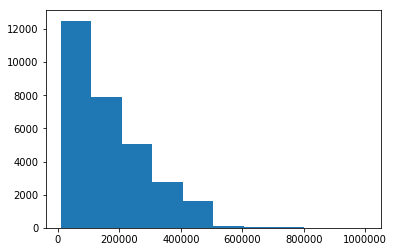

In [67]:
# se grafica LIMIT_BAL
plt.hist(rawData["LIMIT_BAL"])
plt.show()

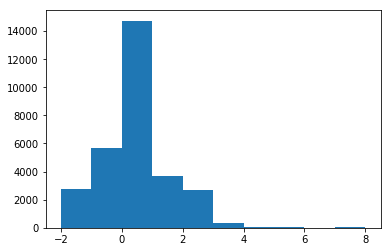

In [32]:
plt.hist(rawData["PAY_0"])
plt.show()

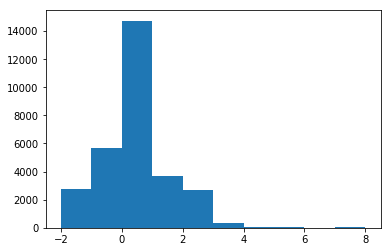

In [34]:
plt.hist(rawData["PAY_2"])
plt.show()

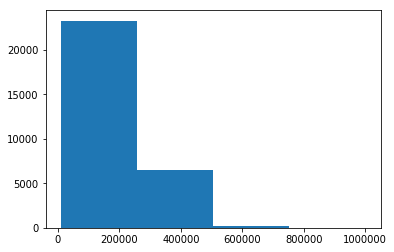

In [68]:
plt.hist(rawData["LIMIT_BAL"], bins=4)
plt.show()

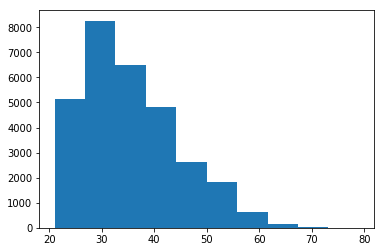

In [69]:
# se grafica AGE
plt.hist(rawData["AGE"])
plt.show()

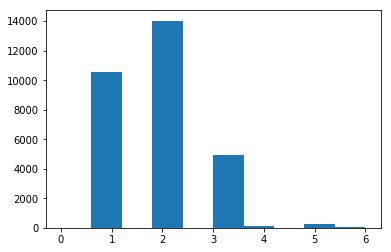

In [70]:
# se grafica EDUCATION
plt.hist(rawData["EDUCATION"])
plt.show()

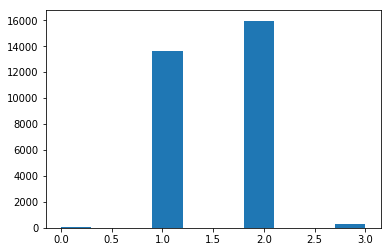

In [71]:
# se grafica MARRIAGE
plt.hist(rawData["MARRIAGE"])
plt.show()

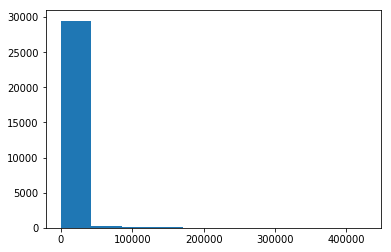

In [73]:
plt.hist(rawData["PAY_AMT5"])
plt.show()

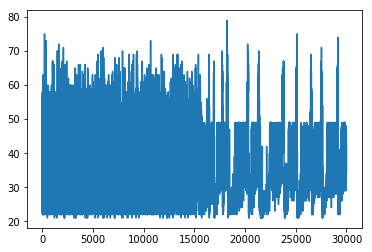

In [75]:
plt.plot(rawData['AGE'])
plt.show()

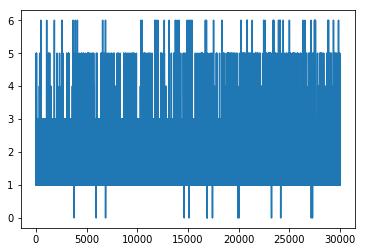

In [76]:
plt.plot(rawData['EDUCATION'])
plt.show()

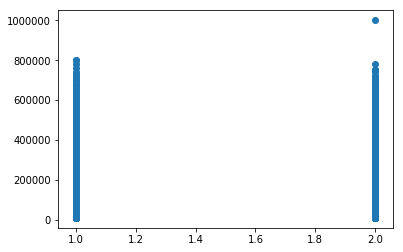

In [77]:
x = rawData['SEX']
y = rawData['LIMIT_BAL']
plt.scatter(x,y)
plt.show()

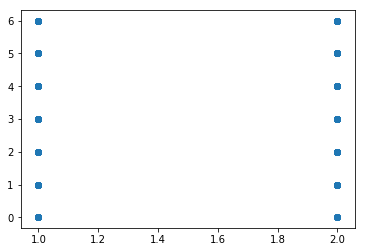

In [78]:
x = rawData['SEX']
y = rawData['EDUCATION']
plt.scatter(x,y)
plt.show()

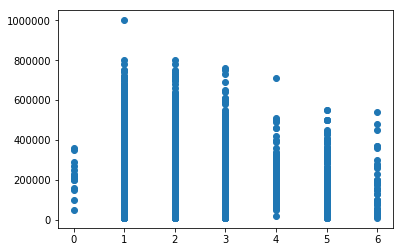

In [79]:
x = rawData['EDUCATION']
y = rawData['LIMIT_BAL']
plt.scatter(x,y)
plt.show()

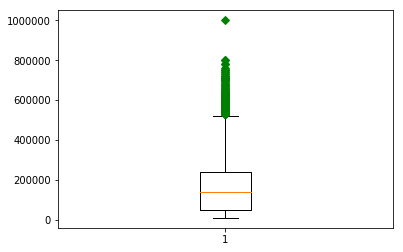

In [82]:
A = rawData["LIMIT_BAL"]
plt.boxplot(A,0,"gD")
plt.show()

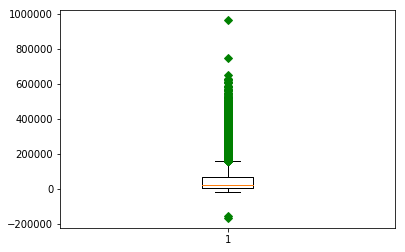

In [83]:
B = rawData["BILL_AMT1"]
plt.boxplot(B,0,"gD")
plt.show()

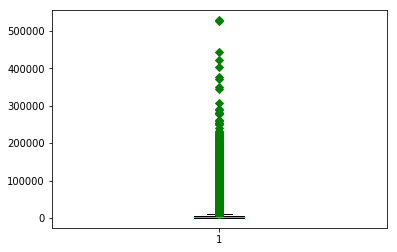

In [86]:
B = rawData["PAY_AMT6"]
plt.boxplot(B,0,"gD")
plt.show()

In [87]:
#Matriz de correlación
corrMat = rawData.corr()
print(corrMat)

                            LIMIT_BAL       SEX  EDUCATION  MARRIAGE  \
LIMIT_BAL                    1.000000  0.024755  -0.219161 -0.108139   
SEX                          0.024755  1.000000   0.014232 -0.031389   
EDUCATION                   -0.219161  0.014232   1.000000 -0.143464   
MARRIAGE                    -0.108139 -0.031389  -0.143464  1.000000   
AGE                          0.144713 -0.090874   0.175061 -0.414170   
PAY_0                       -0.271214 -0.057643   0.105364  0.019917   
PAY_2                       -0.296382 -0.070771   0.121566  0.024199   
PAY_3                       -0.286123 -0.066096   0.114025  0.032688   
PAY_4                       -0.267460 -0.060173   0.108793  0.033122   
PAY_5                       -0.249411 -0.055064   0.097520  0.035629   
PAY_6                       -0.235195 -0.044008   0.082316  0.034345   
BILL_AMT1                    0.285430 -0.033642   0.023581 -0.023472   
BILL_AMT2                    0.278314 -0.031183   0.018749 -0.02

In [3]:
rawData["MARRIAGE"]= np.where(rawData["MARRIAGE"] == 0, 3, rawData["MARRIAGE"])

rawData["EDUCATION"]= np.where(rawData["EDUCATION"] == 0, 4, rawData["EDUCATION"])
rawData["EDUCATION"]= np.where(rawData["EDUCATION"] == 6, 4, rawData["EDUCATION"])
rawData["EDUCATION"]= np.where(rawData["EDUCATION"] == 5, 4, rawData["EDUCATION"])

rawData["EDUCATION"].unique()

array([2, 1, 3, 4], dtype=int64)

In [4]:
# En PAY_0 Hay muy pocos valores mayores a 4 por lo cual se unifican
rawData["PAY_0"]= np.where(rawData["PAY_0"] == 5, 4, rawData["PAY_0"])
rawData["PAY_0"]= np.where(rawData["PAY_0"] == 6, 4, rawData["PAY_0"])
rawData["PAY_0"]= np.where(rawData["PAY_0"] == 7, 4, rawData["PAY_0"])
rawData["PAY_0"]= np.where(rawData["PAY_0"] == 8, 4, rawData["PAY_0"])
rawData["PAY_0"]= np.where(rawData["PAY_0"] == 9, 4, rawData["PAY_0"])

In [5]:
# En PAY_2 Hay muy pocos valores mayores a 4 por lo cual se unifican
rawData["PAY_2"]= np.where(rawData["PAY_2"] == 5, 4, rawData["PAY_2"])
rawData["PAY_2"]= np.where(rawData["PAY_2"] == 6, 4, rawData["PAY_2"])
rawData["PAY_2"]= np.where(rawData["PAY_2"] == 7, 4, rawData["PAY_2"])
rawData["PAY_2"]= np.where(rawData["PAY_2"] == 8, 4, rawData["PAY_2"])
rawData["PAY_2"]= np.where(rawData["PAY_2"] == 9, 4, rawData["PAY_2"])
rawData["PAY_2"].unique()

array([ 2,  0, -1, -2,  3,  4,  1], dtype=int64)

In [6]:
# En PAY_3 Hay muy pocos valores mayores a 4 por lo cual se unifican
rawData["PAY_3"]= np.where(rawData["PAY_3"] == 5, 4, rawData["PAY_3"])
rawData["PAY_3"]= np.where(rawData["PAY_3"] == 6, 4, rawData["PAY_3"])
rawData["PAY_3"]= np.where(rawData["PAY_3"] == 7, 4, rawData["PAY_3"])
rawData["PAY_3"]= np.where(rawData["PAY_3"] == 8, 4, rawData["PAY_3"])
rawData["PAY_3"]= np.where(rawData["PAY_3"] == 9, 4, rawData["PAY_3"])
rawData["PAY_3"].unique()

array([-1,  0,  2, -2,  3,  4,  1], dtype=int64)

In [7]:
# En PAY_4 Hay muy pocos valores mayores a 4 por lo cual se unifican
rawData["PAY_4"]= np.where(rawData["PAY_4"] == 5, 4, rawData["PAY_4"])
rawData["PAY_4"]= np.where(rawData["PAY_4"] == 6, 4, rawData["PAY_4"])
rawData["PAY_4"]= np.where(rawData["PAY_4"] == 7, 4, rawData["PAY_4"])
rawData["PAY_4"]= np.where(rawData["PAY_4"] == 8, 4, rawData["PAY_4"])
rawData["PAY_4"]= np.where(rawData["PAY_4"] == 9, 4, rawData["PAY_4"])
rawData["PAY_4"].unique()

array([-1,  0, -2,  2,  3,  4,  1], dtype=int64)

In [8]:
# En PAY_5 Hay muy pocos valores mayores a 4 por lo cual se unifican
rawData["PAY_5"]= np.where(rawData["PAY_5"] == 5, 4, rawData["PAY_5"])
rawData["PAY_5"]= np.where(rawData["PAY_5"] == 6, 4, rawData["PAY_5"])
rawData["PAY_5"]= np.where(rawData["PAY_5"] == 7, 4, rawData["PAY_5"])
rawData["PAY_5"]= np.where(rawData["PAY_5"] == 8, 4, rawData["PAY_5"])
rawData["PAY_5"]= np.where(rawData["PAY_5"] == 9, 4, rawData["PAY_5"])
rawData["PAY_5"].unique()

array([-2,  0, -1,  2,  3,  4], dtype=int64)

In [21]:
# En PAY_6 Hay muy pocos valores mayores a 4 por lo cual se unifican
rawData["PAY_6"]= np.where(rawData["PAY_6"] == 5, 4, rawData["PAY_6"])
rawData["PAY_6"]= np.where(rawData["PAY_6"] == 6, 4, rawData["PAY_6"])
rawData["PAY_6"]= np.where(rawData["PAY_6"] == 7, 4, rawData["PAY_6"])
rawData["PAY_6"]= np.where(rawData["PAY_6"] == 8, 4, rawData["PAY_6"])
rawData["PAY_6"]= np.where(rawData["PAY_6"] == 9, 4, rawData["PAY_6"])
rawData["PAY_6"].unique()

array([-2,  2,  0, -1,  3,  4], dtype=int64)

In [10]:
#Matriz de correlación
corrMat = rawData.corr()
print(corrMat)

                            LIMIT_BAL       SEX  EDUCATION  MARRIAGE  \
LIMIT_BAL                    1.000000  0.024755  -0.231088 -0.111012   
SEX                          0.024755  1.000000   0.013627 -0.028522   
EDUCATION                   -0.231088  0.013627   1.000000 -0.136797   
MARRIAGE                    -0.111012 -0.028522  -0.136797  1.000000   
AGE                          0.144713 -0.090874   0.182434 -0.412001   
PAY_0                       -0.275204 -0.057395   0.113739  0.019104   
PAY_2                       -0.298975 -0.070846   0.130502  0.024444   
PAY_3                       -0.289008 -0.066219   0.124053  0.032538   
PAY_4                       -0.270815 -0.060129   0.118564  0.032380   
PAY_5                       -0.252155 -0.054769   0.105596  0.034879   
PAY_6                       -0.235195 -0.044008   0.088986  0.033168   
BILL_AMT1                    0.285430 -0.033642   0.016597 -0.027832   
BILL_AMT2                    0.278314 -0.031183   0.011980 -0.02

In [12]:
#Se pasan algunas de las variables a categorical
rawData["SEX"]= rawData["SEX"].astype("category")
rawData["EDUCATION"]= rawData["EDUCATION"].astype("category")
rawData["MARRIAGE"]= rawData["MARRIAGE"].astype("category")
rawData["PAY_0"]= rawData["PAY_0"].astype("category")
rawData["PAY_2"]= rawData["PAY_0"].astype("category")
rawData["PAY_3"]= rawData["PAY_0"].astype("category")
rawData["PAY_4"]= rawData["PAY_0"].astype("category")
rawData["PAY_5"]= rawData["PAY_0"].astype("category")
rawData["PAY_6"]= rawData["PAY_0"].astype("category")
rawData["default payment next month"]= rawData["default payment next month"].astype("category")

In [23]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null category
PAY_2                         30000 non-null category
PAY_3                         30000 non-null category
PAY_4                         30000 non-null category
PAY_5                         30000 non-null category
PAY_6                         30000 non-null category
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int

In [12]:
rawData["PAY_5"].unique()

[2, -1, 0, -2, 1, 3, 4]
Categories (7, int64): [2, -1, 0, -2, 1, 3, 4]

In [13]:
newDataDummy=rawData.iloc[ : ,0:23]
newDataDummy.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,2,2,2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,-1,-1,-1,-1,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,-1,-1,-1,-1,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [14]:
newDataDummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null category
EDUCATION    30000 non-null category
MARRIAGE     30000 non-null category
AGE          30000 non-null int64
PAY_0        30000 non-null category
PAY_2        30000 non-null category
PAY_3        30000 non-null category
PAY_4        30000 non-null category
PAY_5        30000 non-null category
PAY_6        30000 non-null category
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
dtypes: category(9), int64(14)
memory usage: 3.5 MB


### Dummy Variables

In [15]:
newDataDummy = pd.get_dummies(newDataDummy)
newDataDummy.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_2,PAY_5_3,PAY_5_4,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4
0,20000,24,3913,3102,689,0,0,0,0,689,...,1,0,0,0,0,0,0,1,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,0,1,0,0,0,0,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,0,0,0,1,0,0,0,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,0,0,0,1,0,0,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,0,0,1,0,0,0,0,0


In [16]:
newDataDummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 65 columns):
LIMIT_BAL      30000 non-null int64
AGE            30000 non-null int64
BILL_AMT1      30000 non-null int64
BILL_AMT2      30000 non-null int64
BILL_AMT3      30000 non-null int64
BILL_AMT4      30000 non-null int64
BILL_AMT5      30000 non-null int64
BILL_AMT6      30000 non-null int64
PAY_AMT1       30000 non-null int64
PAY_AMT2       30000 non-null int64
PAY_AMT3       30000 non-null int64
PAY_AMT4       30000 non-null int64
PAY_AMT5       30000 non-null int64
PAY_AMT6       30000 non-null int64
SEX_1          30000 non-null uint8
SEX_2          30000 non-null uint8
EDUCATION_1    30000 non-null uint8
EDUCATION_2    30000 non-null uint8
EDUCATION_3    30000 non-null uint8
EDUCATION_4    30000 non-null uint8
MARRIAGE_1     30000 non-null uint8
MARRIAGE_2     30000 non-null uint8
MARRIAGE_3     30000 non-null uint8
PAY_0_-2       30000 non-null uint8
PAY_0_-1       30000 non-nu

In [17]:
newDataDummy["DefaultPaymentNextMonth"] = rawData["default payment next month"]


In [18]:
newDataDummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 66 columns):
LIMIT_BAL                  30000 non-null int64
AGE                        30000 non-null int64
BILL_AMT1                  30000 non-null int64
BILL_AMT2                  30000 non-null int64
BILL_AMT3                  30000 non-null int64
BILL_AMT4                  30000 non-null int64
BILL_AMT5                  30000 non-null int64
BILL_AMT6                  30000 non-null int64
PAY_AMT1                   30000 non-null int64
PAY_AMT2                   30000 non-null int64
PAY_AMT3                   30000 non-null int64
PAY_AMT4                   30000 non-null int64
PAY_AMT5                   30000 non-null int64
PAY_AMT6                   30000 non-null int64
SEX_1                      30000 non-null uint8
SEX_2                      30000 non-null uint8
EDUCATION_1                30000 non-null uint8
EDUCATION_2                30000 non-null uint8
EDUCATION_3                

In [44]:
#Matriz de correlación
corrMat = newDataDummy.corr()
print(corrMat)

                         LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  \
LIMIT_BAL                 1.000000  0.144713   0.285430   0.278314   0.283236   
AGE                       0.144713  1.000000   0.056239   0.054283   0.053710   
BILL_AMT1                 0.285430  0.056239   1.000000   0.951484   0.892279   
BILL_AMT2                 0.278314  0.054283   0.951484   1.000000   0.928326   
BILL_AMT3                 0.283236  0.053710   0.892279   0.928326   1.000000   
BILL_AMT4                 0.293988  0.051353   0.860272   0.892482   0.923969   
BILL_AMT5                 0.295562  0.049345   0.829779   0.859778   0.883910   
BILL_AMT6                 0.290389  0.047613   0.802650   0.831594   0.853320   
PAY_AMT1                  0.195236  0.026147   0.140277   0.280365   0.244335   
PAY_AMT2                  0.178408  0.021785   0.099355   0.100851   0.316936   
PAY_AMT3                  0.210167  0.029247   0.156887   0.150718   0.130011   
PAY_AMT4                  0.

In [100]:
# No puedo utilizar KBinsDiscretizer
from sklearn import preprocessing
# intente de dos formas
from sklearn.preprocessing import  KBinsDiscretizer
#temp = preprocessing.KBinsDiscretizer(n_bins=[4], encode='ordinal').fit(rawData["EDUCATION"])

ImportError: cannot import name 'KBinsDiscretizer'

In [19]:
#features
features = newDataDummy.iloc[:,0:65]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_2,PAY_5_3,PAY_5_4,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4
0,20000,24,3913,3102,689,0,0,0,0,689,...,1,0,0,0,0,0,0,1,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,0,1,0,0,0,0,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,0,0,0,1,0,0,0,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,0,0,0,1,0,0,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,0,0,1,0,0,0,0,0


In [20]:
#dependent variable
depVar = newDataDummy['DefaultPaymentNextMonth']

### Normalización

In [45]:
from sklearn import preprocessing
#Normaliza el conjunto de datos de las variables independientes
features = preprocessing.scale(features)
print(features)

[[-1.13672015 -1.24601985 -0.64250107 ...  3.20134252 -0.10416231
  -0.06871822]
 [-0.3659805  -1.02904717 -0.65921875 ... -0.31236895 -0.10416231
  -0.06871822]
 [-0.59720239 -0.16115646 -0.29855966 ... -0.31236895 -0.10416231
  -0.06871822]
 ...
 [-1.05964618  0.16430256 -0.64722711 ... -0.31236895 -0.10416231
  14.5521805 ]
 [-0.67427636  0.59824792 -0.71798186 ... -0.31236895 -0.10416231
  -0.06871822]
 [-0.90549825  1.14067961 -0.04473888 ... -0.31236895 -0.10416231
  -0.06871822]]


#### RFE with Cross Validation

In [21]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

RFC = RandomForestClassifier(random_state=101)

In [22]:
rfecv = RFECV(estimator = RFC, step = 1, cv=StratifiedKFold(10), scoring = 'accuracy')

In [23]:
rfecv.fit(features,depVar)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

In [24]:
#Muestra el número de atributo necesarios para obtener la mayor precisión en el modelo.
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 64


In [25]:
print(np.where(rfecv.support_ == False)[0])

[28]


In [26]:
features.drop(features.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

#### Partición en Training y Testing Sets

In [27]:
#Largo del set de variables independientes
len(features)

30000

In [28]:
#Determina el tamaño de los conjuntos de datos de entrenamiento y testeo
trainSize = int(.70*len(features))
testSize = int(.30*len(features))
print(trainSize, testSize)

21000 9000


In [29]:
#Training Set (Feature Space: X Training)
X_train = (features[: trainSize])
X_train.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_2,PAY_5_3,PAY_5_4,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4
0,20000,24,3913,3102,689,0,0,0,0,689,...,1,0,0,0,0,0,0,1,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,0,1,0,0,0,0,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,0,0,0,1,0,0,0,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,0,0,0,1,0,0,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,0,0,1,0,0,0,0,0


In [30]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: trainSize]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()
#y_train.tail()

The number of observations in the Y training set are: 21000


0    1
1    1
2    0
3    0
4    0
Name: DefaultPaymentNextMonth, dtype: category
Categories (2, int64): [0, 1]

In [31]:
#Testing Set (X Testing)
X_test = features[-testSize:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.tail())

The number of observations in the feature testing set is: 9000
       LIMIT_BAL  AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
29995     220000   39     188948     192815     208365      88004      31237   
29996     150000   43       1683       1828       3502       8979       5190   
29997      30000   37       3565       3356       2758      20878      20582   
29998      80000   41      -1645      78379      76304      52774      11855   
29999      50000   46      47929      48905      49764      36535      32428   

       BILL_AMT6  PAY_AMT1  PAY_AMT2   ...     PAY_5_2  PAY_5_3  PAY_5_4  \
29995      15980      8500     20000   ...           0        0        0   
29996          0      1837      3526   ...           0        0        0   
29997      19357         0         0   ...           0        0        1   
29998      48944     85900      3409   ...           0        0        0   
29999      15313      2078      1800   ...           0        0        0   


In [32]:
#Ground Truth (y_test) 
y_test = depVar[-testSize:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 9000


21000    0
21001    1
21002    0
21003    1
21004    1
Name: DefaultPaymentNextMonth, dtype: category
Categories (2, int64): [0, 1]

In [33]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape
model = LinearRegression(n_jobs=10)


In [84]:
# Modelo de clasificación Support Vector Machines
from sklearn import svm
    
modelSVM = svm.SVC()
modelSVM.fit(X_train,y_train)
modelSVM

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [89]:
print(cross_val_score(modelSVM,X_train,y_train))

[0.7686643  0.76809754 0.76987554]


In [90]:
modelSVM.score(X_train,y_train)

0.9937351845580765

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

modelRF = RandomForestClassifier(max_depth=2, random_state=0)
modelRF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [35]:
print(modelRF.feature_importances_)

[0.         0.         0.         0.04013061 0.         0.00114309
 0.         0.         0.07762842 0.         0.         0.02385253
 0.02297298 0.00186732 0.         0.         0.         0.
 0.         0.00119911 0.         0.         0.         0.
 0.         0.         0.         0.2272916  0.         0.
 0.         0.04174627 0.         0.14417214 0.         0.
 0.         0.         0.         0.         0.16233675 0.01196321
 0.         0.         0.         0.03813094 0.         0.
 0.         0.         0.         0.         0.07447254 0.01808945
 0.         0.02432835 0.         0.         0.         0.05669409
 0.01415129 0.         0.01782932 0.        ]


In [36]:
print(cross_val_score(modelRF,X_train,y_train))

[0.81107161 0.80441961 0.79502159]


In [37]:
modelRF.score(X_train,y_train)

0.8035049102607518

In [92]:
from sklearn.linear_model import SGDClassifier

modelSGD = SGDClassifier(loss="log",penalty="elasticnet",max_iter=400,shuffle=True)
modelSGD.fit(X_train,y_train)
print(cross_val_score(modelSGD,X_train,y_train))

[0.76790249 0.60985522 0.76860554]


In [93]:
modelSGD.score(X_train,y_train)

0.7674398916356248

#### Predicciones

In [94]:
predSVM = modelSVM.predict(X_test)
accuracy_score(y_test,predSVM)

0.7739969527679025

In [38]:
predRF = modelRF.predict(X_test)
accuracy_score(y_test,predRF)

0.8062468257998985

In [97]:
predSGD = modelSGD.predict(X_test)
accuracy_score(y_test,predSGD)

0.7745048247841544

#### Otros gráficos de los datos

[Text(0,0,'Revolutivo'),
 Text(0,0,'Pago Completo'),
 Text(0,0,'Atraso 1mes'),
 Text(0,0,'No gastó'),
 Text(0,0,'Atraso 2mes'),
 Text(0,0,'Atraso 3mes'),
 Text(0,0,'Atraso 4 o más')]

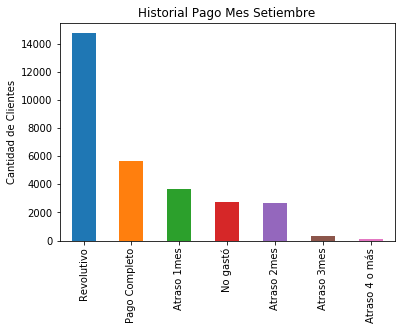

In [81]:
pay0_plot = rawData["PAY_0"].value_counts()
pay0_plot = pay0_plot.plot(kind='bar')

pay0_plot.set_ylabel('Cantidad de Clientes')
pay0_plot.set_title('Historial Pago Mes Setiembre')
#pay0_plot.set_xticks(5)
pay0_plot.set_xticklabels( ('Revolutivo', 'Pago Completo','Atraso 1mes','No gastó','Atraso 2mes','Atraso 3mes','Atraso 4 o más') )


[Text(0,0,'Universitario'),
 Text(0,0,'Posgrado'),
 Text(0,0,'Colegio'),
 Text(0,0,'Otro')]

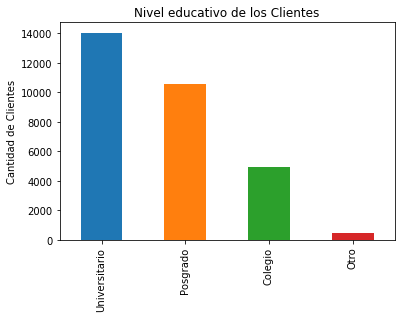

In [85]:
Educ_plot = rawData["EDUCATION"].value_counts()
Educ_plot = Educ_plot.plot(kind='bar')

Educ_plot.set_ylabel('Cantidad de Clientes')
Educ_plot.set_title('Nivel educativo de los Clientes')
#Educ_plot.set_xticks(10)
Educ_plot.set_xticklabels( ('Universitario', 'Posgrado','Colegio','Otro') )


[Text(0,0,'Revolutivo'),
 Text(0,0,'Pago Completo'),
 Text(0,0,'Atraso 1mes'),
 Text(0,0,'No gastó'),
 Text(0,0,'Atraso 2mes'),
 Text(0,0,'Atraso 3mes'),
 Text(0,0,'Atraso 4 o más')]

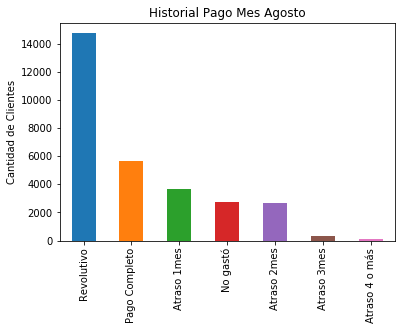

In [87]:
pay2_plot = rawData["PAY_2"].value_counts()
pay2_plot = pay2_plot.plot(kind='bar')

pay2_plot.set_ylabel('Cantidad de Clientes')
pay2_plot.set_title('Historial Pago Mes Agosto')
pay2_plot.set_xticklabels( ('Revolutivo', 'Pago Completo','Atraso 1mes','No gastó','Atraso 2mes','Atraso 3mes','Atraso 4 o más') )


[Text(0,0,'Soltero'), Text(0,0,'Casado'), Text(0,0,'Otro')]

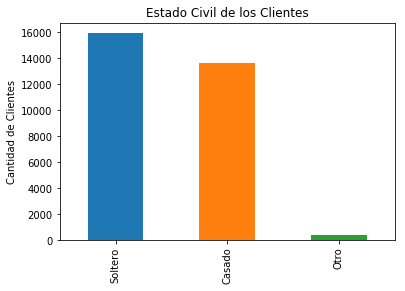

In [89]:
EstCiv_plot = rawData["MARRIAGE"].value_counts()
EstCiv_plot = EstCiv_plot.plot(kind='bar')

EstCiv_plot.set_ylabel('Cantidad de Clientes')
EstCiv_plot.set_title('Estado Civil de los Clientes')
#EstCiv_plot.set_xticks(10)
EstCiv_plot.set_xticklabels( ('Soltero', 'Casado','Otro') )

In [90]:
rawData.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000
